In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, KFold
from sklearn.metrics import classification_report, auc, RocCurveDisplay, roc_curve, accuracy_score
from hw3 import *

In [14]:
train_set = read_file("data/D2z.txt")


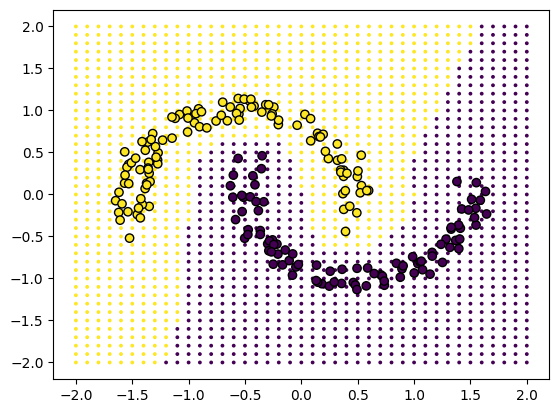

In [15]:
test_set = np.zeros([41 * 41, 3])
coords = np.linspace(-2, 2, num=41)
for i in range(len(coords)):
    for j in range(len(coords)):
        index = i * 41 + j
        test_set[index, :2] = [coords[i], coords[j]]
        test_set[index, 2] = knn(train_set, test_set[index, :-1], 1)

plt.scatter(test_set[:, 0], test_set[:, 1], s=3, c=test_set[:, 2])
plt.scatter(train_set[:, 0], train_set[:, 1], c=train_set[:, 2], edgecolors="black")
plt.show()

In [230]:
df = pd.read_csv("data/emails.csv")
X = df.drop(["Email No.", "Prediction"], axis=1)
Y = df["Prediction"]

In [227]:
kf = KFold(n_splits=5)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X.loc[train_index], Y.loc[train_index])
    print(classification_report(neigh.predict(X.loc[test_index]), Y.loc[test_index]))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       644
           1       0.82      0.65      0.73       356

    accuracy                           0.82      1000
   macro avg       0.82      0.79      0.80      1000
weighted avg       0.82      0.82      0.82      1000

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       650
           1       0.87      0.69      0.77       350

    accuracy                           0.85      1000
   macro avg       0.86      0.81      0.83      1000
weighted avg       0.85      0.85      0.85      1000

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       670
           1       0.84      0.72      0.78       330

    accuracy                           0.86      1000
   macro avg       0.85      0.83      0.84      1000
weighted avg       0.86      0.86      0.86      1000

              preci

In [248]:
kf = KFold(n_splits=5)
for j in [1, 3, 5, 7, 10]:
    print(j)
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        neigh = KNeighborsClassifier(n_neighbors=j)
        neigh.fit(X.loc[train_index], Y.loc[train_index])
        print(accuracy_score(neigh.predict(X.loc[test_index]), Y.loc[test_index]))

1
0.825
0.853
0.862
0.851
0.775
3
0.847
0.851
0.859
0.88
0.774
5
0.837
0.85
0.869
0.869
0.779
7
0.839
0.864
0.875
0.874
0.779
10
0.862
0.869
0.878
0.887
0.782


In [246]:
neigh = KNeighborsClassifier()
knn_gscv = GridSearchCV(
    neigh,
    scoring=["accuracy"],
    param_grid={"n_neighbors": [1, 3, 5, 7, 10]},
    cv=5,
    refit=False,
)
knn_gscv.fit(X, Y).cv_results_

{'mean_fit_time': array([0.90018625, 0.32028408, 0.42044206, 0.30830851, 0.28819981]),
 'std_fit_time': array([0.89563471, 0.09761692, 0.20509916, 0.09803934, 0.06212041]),
 'mean_score_time': array([1.32973981, 0.9180069 , 1.01086259, 1.01659636, 1.17651467]),
 'std_score_time': array([0.27724332, 0.19362443, 0.21454015, 0.17425547, 0.25483866]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 10}],
 'split0_test_accuracy': array([0.826, 0.849, 0.842, 0.84 , 0.862]),
 'split1_test_accuracy': array([0.851, 0.85 , 0.849, 0.858, 0.869]),
 'split2_test_accuracy': array([0.866, 0.859, 0.873, 0.874, 0.872]),
 'split3_test_accuracy': array([0.859, 0.886, 0.878, 0.879, 0.891]),
 'split4_test_accuracy': array([0.777, 0.777, 0.781, 0.781, 0.786]),
 'mean_test_accur

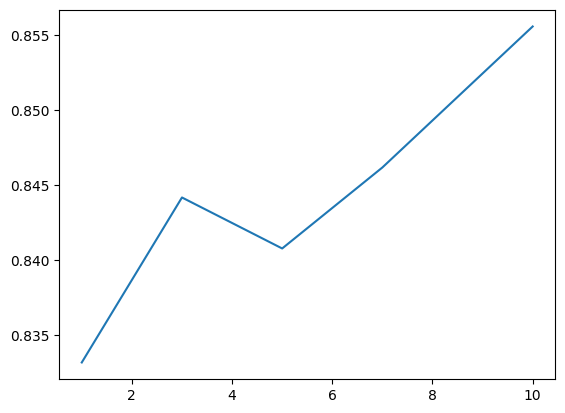

In [249]:
plt.plot([1, 3, 5, 7, 10],  [0.8332, 0.8442, 0.8408, 0.8462, 0.8556 ])
plt.show()

In [219]:
def logistic_regression(
    X_train: np.ndarray, Y_train: np.ndarray, epoch: int, learning_rate: float
) -> np.ndarray:
    weights = np.zeros(X_train.shape[1])
    for i in range(epoch):
        weights -= learning_rate * gradient(weights, X_train, Y_train)
    return weights


def gradient(
    weights: np.ndarray, X_train: np.ndarray, Y_train: np.ndarray
) -> np.ndarray:
    sigmoid = 1 / (1 + np.exp(-np.matmul(X_train, weights)))
    return np.matmul(sigmoid - Y_train, X_train) / len(Y_train)


def evaluate(weights: np.ndarray, X_test: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-np.matmul(X_test, weights)))


def cv(X_train, Y_train, folds: int):
    step = 5000 // folds
    for i in range(0, 5000, step):
        X_test = X_train[i : i + step]
        Y_test = Y_train[i : i + step]
        X_cv_train = np.concatenate((X_train[0:i], X_train[i + step :]))
        Y_cv_train = np.concatenate((Y_train[0:i], Y_train[i + step :]))
        
        weights = logistic_regression(X_cv_train, Y_cv_train, 250, 10)
        Y_pred = evaluate(weights, X_test)
        print(classification_report(np.round(Y_pred), Y_test))

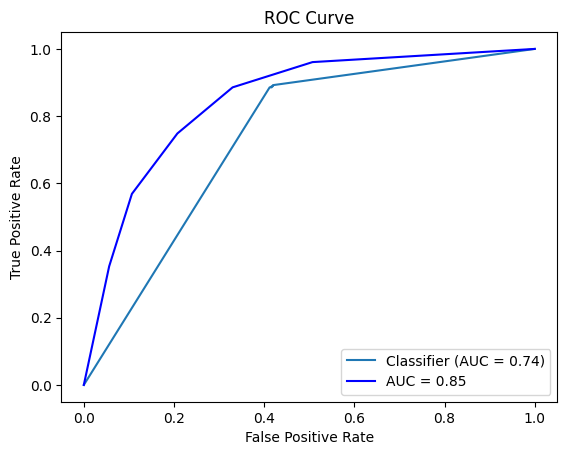

/var/folders/_0/1klf15wn7bl68lv8p0y9p3k00000gn/T/ipykernel_32752/705755372.py:13: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-np.matmul(X_train, weights)))
/var/folders/_0/1klf15wn7bl68lv8p0y9p3k00000gn/T/ipykernel_32752/705755372.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.matmul(X_test, weights)))


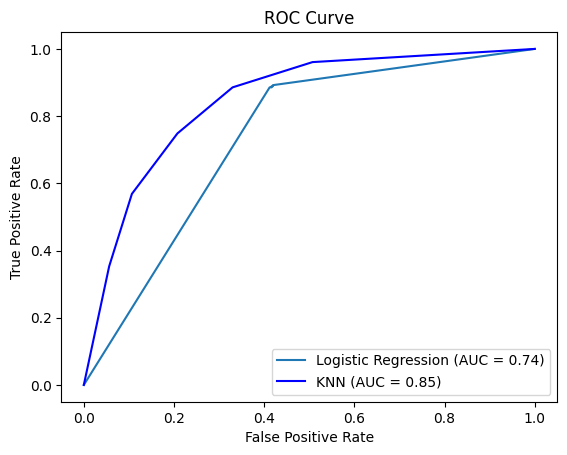

In [245]:
X_train = X.to_numpy()
Y_train = Y.to_numpy()
weights = logistic_regression(X_train[:4000], Y_train[:4000], 250, 10)
Y_pred = evaluate(weights, X_train[4000:])

RocCurveDisplay.from_predictions(Y_train[4000:], Y_pred, name='Logistic Regression')

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X.iloc[:4000], Y[:4000])

y_scores = neigh.predict_proba(X.iloc[4000:])
fpr, tpr, threshold = roc_curve(Y[4000:], y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'KNN (AUC = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

In [239]:
Y_pred.shape

(1000,)

In [218]:
X["intercept"] = 1
X_train = X.to_numpy()
Y_train = Y.to_numpy()

cv(X_train, Y_train, 5)

0


/var/folders/_0/1klf15wn7bl68lv8p0y9p3k00000gn/T/ipykernel_32752/1189570777.py:13: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-np.matmul(X_train, weights)))
/var/folders/_0/1klf15wn7bl68lv8p0y9p3k00000gn/T/ipykernel_32752/1189570777.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.matmul(X_test, weights)))


fold 1
               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       697
         1.0       0.79      0.74      0.77       303

    accuracy                           0.86      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.86      0.86      0.86      1000

1000


/var/folders/_0/1klf15wn7bl68lv8p0y9p3k00000gn/T/ipykernel_32752/1189570777.py:13: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-np.matmul(X_train, weights)))
/var/folders/_0/1klf15wn7bl68lv8p0y9p3k00000gn/T/ipykernel_32752/1189570777.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.matmul(X_test, weights)))


fold 1
               precision    recall  f1-score   support

         0.0       0.93      0.86      0.89       784
         1.0       0.60      0.77      0.67       216

    accuracy                           0.84      1000
   macro avg       0.77      0.81      0.78      1000
weighted avg       0.86      0.84      0.85      1000

2000


/var/folders/_0/1klf15wn7bl68lv8p0y9p3k00000gn/T/ipykernel_32752/1189570777.py:13: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-np.matmul(X_train, weights)))
/var/folders/_0/1klf15wn7bl68lv8p0y9p3k00000gn/T/ipykernel_32752/1189570777.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.matmul(X_test, weights)))


fold 1
               precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       642
         1.0       0.81      0.65      0.72       358

    accuracy                           0.82      1000
   macro avg       0.82      0.78      0.79      1000
weighted avg       0.82      0.82      0.81      1000

3000


/var/folders/_0/1klf15wn7bl68lv8p0y9p3k00000gn/T/ipykernel_32752/1189570777.py:13: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-np.matmul(X_train, weights)))
/var/folders/_0/1klf15wn7bl68lv8p0y9p3k00000gn/T/ipykernel_32752/1189570777.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.matmul(X_test, weights)))


fold 1
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.88       638
         1.0       0.83      0.67      0.74       362

    accuracy                           0.83      1000
   macro avg       0.83      0.80      0.81      1000
weighted avg       0.83      0.83      0.83      1000

4000


/var/folders/_0/1klf15wn7bl68lv8p0y9p3k00000gn/T/ipykernel_32752/1189570777.py:13: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-np.matmul(X_train, weights)))


fold 1
               precision    recall  f1-score   support

         0.0       0.95      0.74      0.83       888
         1.0       0.25      0.70      0.37       112

    accuracy                           0.74      1000
   macro avg       0.60      0.72      0.60      1000
weighted avg       0.87      0.74      0.78      1000



/var/folders/_0/1klf15wn7bl68lv8p0y9p3k00000gn/T/ipykernel_32752/1189570777.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.matmul(X_test, weights)))


In [212]:
X_train[5000:]

array([], shape=(0, 3001), dtype=int64)